<a href="https://colab.research.google.com/github/truonghaidang1999/KyNangNghe/blob/main/EmotionDetec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd                       #reading, writing and manipulating the data (using tables)
import numpy as np                        #Library for linear algebra and some probabiltity (raw data)
import tensorflow as tf                       
from keras.models import Sequential       #To create the sequential layer

#from keras.layers.core import Flatten, Dense, Dropout     #To create the model
#from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D  #To create the model
from keras.preprocessing import image             #used for image classification
from keras.preprocessing.image import ImageDataGenerator  #used to expand the training dataset in order to improve the performance and ability of the model to generalize

from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from keras.optimizers import SGD, Adam          #To use the optimizer
from keras.utils import np_utils  

#import cv2                                #CV (computer vision)
#from google.colab import files            #To be able to upload files

In [ ]:
print('Upload the CSV file')
#uploaded = files.upload()
emotion_data = pd.read_csv('/content/drive/MyDrive/fer2013.csv')
print(emotion_data)

Upload the CSV file
       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


In [ ]:
#---------------------- Spliting the DataSet------------------------------------
X_train = []      #train pixels
y_train = []      #train labels
X_test = []       #test pixels
y_test = []       #test label
for index, row in emotion_data.iterrows():    #iterate on each row and store it
    k = row['pixels'].split(" ")       #list of pixels, each pixel is an element
    try:
      if row['Usage'] == 'Training':    
          X_train.append(np.array(k,'float32'))    #The desired data-type for the array is 
          y_train.append(row['emotion'])
      elif row['Usage'] == 'PublicTest':
          X_test.append(np.array(k,'float32'))
          y_test.append(row['emotion'])
    except:
      print(f"error occured at index :{index} and row:{row}")




print(X_test)
print(type(X_test))


print(y_train)
print(type(y_train))

[array([254., 254., 254., ...,  42., 129., 180.], dtype=float32), array([156., 184., 198., ..., 172., 167., 161.], dtype=float32), array([ 69., 118.,  61., ...,  88.,  87.,  90.], dtype=float32), array([205., 203., 236., ...,  43.,  82.,  86.], dtype=float32), array([87., 79., 74., ..., 41., 34., 32.], dtype=float32), array([235., 233., 223., ...,  33.,  17.,  19.], dtype=float32), array([ 71.,  70., 104., ..., 127., 105., 108.], dtype=float32), array([176., 177., 170., ..., 130., 144., 141.], dtype=float32), array([255., 255., 255., ..., 255., 255., 255.], dtype=float32), array([126., 126., 123., ..., 130.,  97.,  78.], dtype=float32), array([180., 175., 169., ...,  32.,  32.,  33.], dtype=float32), array([ 88.,  46.,  35., ..., 229., 228., 227.], dtype=float32), array([121., 112.,  64., ...,  81.,  83.,  85.], dtype=float32), array([165., 203., 211., ..., 189., 178., 167.], dtype=float32), array([22., 28., 27., ..., 90., 81., 92.], dtype=float32), array([132., 154., 165., ...,  70., 

In [ ]:
#--------------------Convert Lists to Numpy arrays------------------------------
X_train = np.array(X_train, 'float32')
y_train = np.array(y_train, 'float32')
X_test = np.array(X_test,'float32')
y_test = np.array(y_test,'float32')

#-----------------------Reshape Pixels arrays---------------------------------
#normalizing data between o and 1  
X_train -= np.mean(X_train, axis=0)  
X_train /= np.std(X_train, axis=0)  

X_test -= np.mean(X_test, axis=0)  
X_test /= np.std(X_test, axis=0) 

#reshape the numpy array to be passed to the model
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)   
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

print(X_test.shape)
print(type(X_test))
print(X_train.shape)

#------------------Convert Labels array to categorial ones---------------------
#y_train= tf.keras.utils.to_categorical(y_train, num_classes=7)
#y_test = tf.keras.utils.to_categorical(y_test, num_classes=7)

y_train= np_utils.to_categorical(y_train, num_classes=7)
y_test = np_utils.to_categorical(y_test, num_classes=7)
print(y_train)
print(y_train.shape)
print(type(y_train))

(3589, 48, 48, 1)
<class 'numpy.ndarray'>
(28709, 48, 48, 1)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
(28709, 7)
<class 'numpy.ndarray'>


In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=(X_train.shape[1:]),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 256)       2

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
batch = 32
epoch = 30

history = model.fit(X_train,y_train,batch_size= batch,epochs= epoch,verbose=1,validation_data=(X_test, y_test),shuffle=True)

Epoch 1/30
898/898 [==============================] - 118s 97ms/step - loss: 1.7844 - accuracy: 0.2630 - val_loss: 1.5532 - val_accuracy: 0.3823
Epoch 2/30
898/898 [==============================] - 86s 96ms/step - loss: 1.4514 - accuracy: 0.4272 - val_loss: 1.3379 - val_accuracy: 0.4720
Epoch 3/30
898/898 [==============================] - 86s 96ms/step - loss: 1.2902 - accuracy: 0.4961 - val_loss: 1.2549 - val_accuracy: 0.5210
Epoch 4/30
898/898 [==============================] - 86s 96ms/step - loss: 1.1708 - accuracy: 0.5417 - val_loss: 1.1831 - val_accuracy: 0.5425
Epoch 5/30
898/898 [==============================] - 86s 96ms/step - loss: 1.0706 - accuracy: 0.5869 - val_loss: 1.1829 - val_accuracy: 0.5461
Epoch 6/30
898/898 [==============================] - 86s 96ms/step - loss: 0.9541 - accuracy: 0.6351 - val_loss: 1.1804 - val_accuracy: 0.5653
Epoch 7/30
898/898 [==============================] - 86s 96ms/step - loss: 0.8429 - accuracy: 0.6852 - val_loss: 1.1819 - val_accuracy

In [ ]:
loss_and_metrics = model.evaluate(X_test,y_test)
print(loss_and_metrics)

113/113 [==============================] - 4s 31ms/step - loss: 2.5396 - accuracy: 0.6004
[2.5396358966827393, 0.6004458069801331]


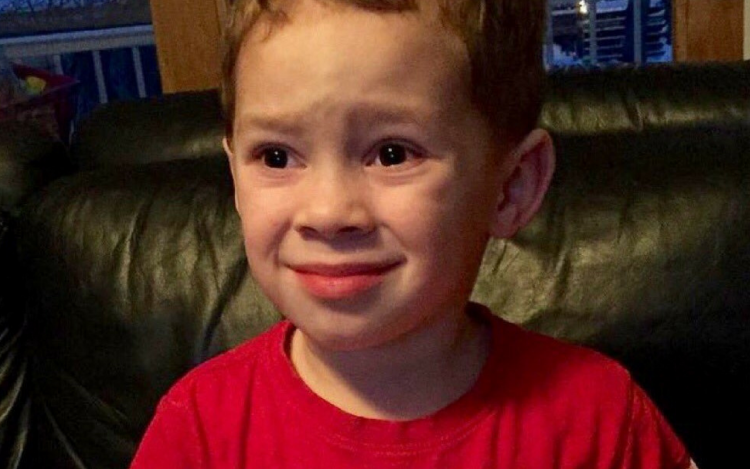



0 = angry


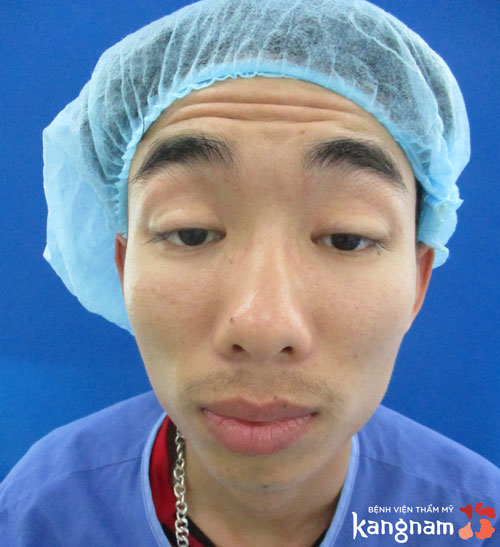



2 = fear


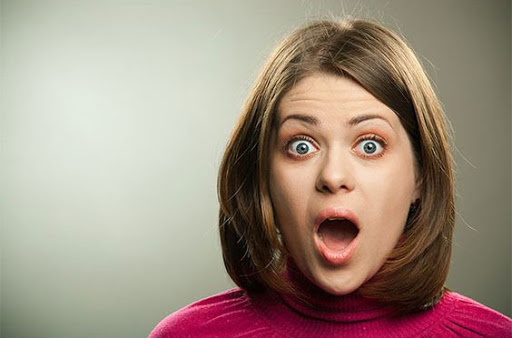



3 = happy


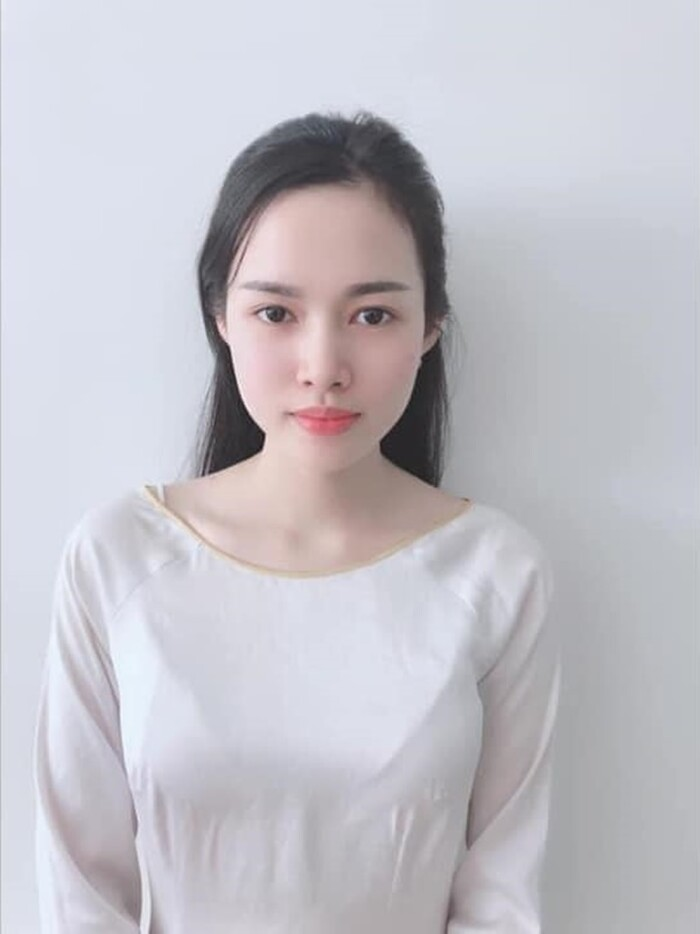



5 = surprise


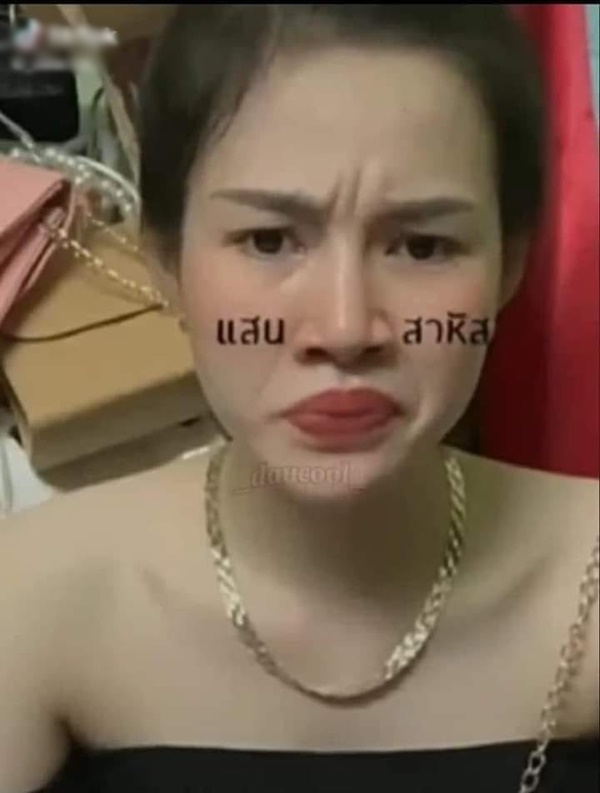



2 = fear


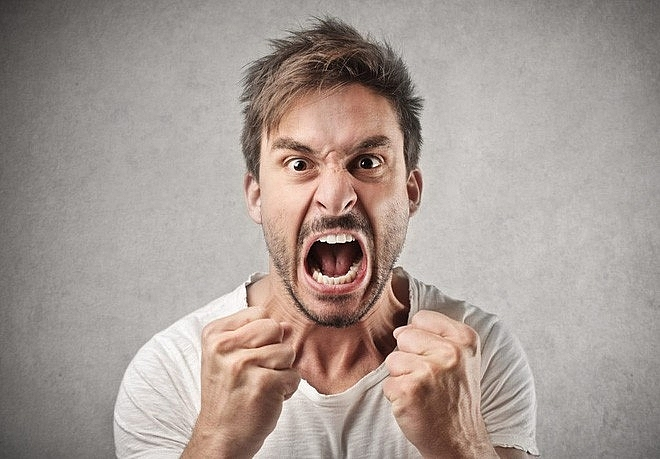



2 = fear


In [ ]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

TGREEN =  '\033[1;37;42m'
TRED =    '\033[1;37;41m'
TYELLOW = '\033[0;43m'

for i in range (1,7):
  img_directory = str(i) + '.jpeg'
  img_data = image.load_img(img_directory, target_size = (48, 48))   #load the image from the directory
  img_data = image.img_to_array(img_data)                            #convert the image to a Numpy array
  img_data = tf.image.rgb_to_grayscale(img_data)

  #print(img_data.shape)
  #img_data = np.array(img_data, 'float32')
  #img_data.resize(48,48,1)
  #print(img_data.shape)
  img_data = np.expand_dims(img_data, axis = 0)                     #expands the array by inserting a new axis at the specified position.
  #print(img_data.shape)

  classify = model.predict(img_data)
  display(Image(img_directory,width= 150, height=150))
  print("\n")
  max_index = np.argmax(classify[0])
  emotion_detection = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  emotion_prediction = emotion_detection[max_index]  
  
  if(max_index == 3 or max_index == 5):
    print(TGREEN + str(max_index) + ' = ' +  emotion_prediction)
  elif(max_index == 4 or max_index == 2 or max_index == 0):
    print(TRED + str(max_index) + ' = ' +  emotion_prediction)
  else:
    print(TYELLOW + str(max_index) + ' = ' +  emotion_prediction)